In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shapefile

# a nice way of filtering out deprecated warnings
import warnings
warnings.filterwarnings("ignore")

## Importing the 2019 and 2020 dataframes

In [6]:
final_df_1 = pd.read_pickle("final_df_1.pkl")
final_df_2 = pd.read_pickle("final_df_2.pkl")

In [ ]:
final_df = pd.concat([final_df_1.reset_index(drop=True), final_df_2.reset_index(drop=True)], axis= 1)

In [ ]:
final_df['year'] = 2019

In [7]:
final_df_1_test = pd.read_pickle("final_df_1_test.pkl")
final_df_2_test = pd.read_pickle("final_df_2_test.pkl")

In [8]:
final_df_test = pd.concat([final_df_1_test.reset_index(drop=True), final_df_2_test.reset_index(drop=True)], axis= 1)

In [9]:
final_df_test['year'] = 2020

In [ ]:
combined_taxi_df = pd.concat([final_df, final_df_test], axis=0)

In [ ]:
combined_taxi_df.shape

In [ ]:
combined_taxi_df.to_pickle("final_df.pkl")

## Outlier Analysis

In [20]:
fare_distance_df = combined_taxi_df[["fare_amount", "trip_distance"]]

Plotting the two variables

<AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>

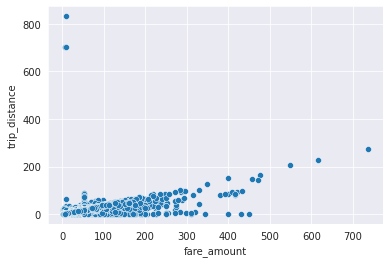

In [7]:
sns.set_style("darkgrid")
sns.scatterplot(data=fare_distance_df, x="fare_amount", y="trip_distance")

Remove the instances at the top left of the graph

In [ ]:
combined_taxi_df = combined_taxi_df[(combined_taxi_df.trip_distance < 400)]

In [9]:
final_df = final_df[(final_df.trip_distance < 400)]
final_df.to_pickle("../data/2019_df.pkl")

In [5]:
final_df_test = df_2020[(df_2020.trip_distance < 400)]
final_df_test.to_pickle("../data/2020_df.pkl")

## Visualisations

### Tip Percentage Distribution

Basic Statistics

In [30]:
combined_taxi_df['tip_pct'].describe()

count    2.626174e+07
mean     1.511481e+01
std      5.070221e+00
min      0.000000e+00
25%      1.304348e+01
50%      1.666667e+01
75%      1.666667e+01
max      9.902773e+01
Name: tip_pct, dtype: float64

In [31]:
combined_taxi_df['tip_pct'].mode()

0    16.666667
dtype: float64

Plotting the distribution

Text(0, 0.5, 'Count of Rides')

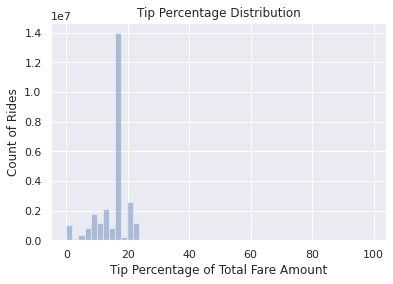

In [32]:
sns.set(style="darkgrid")
fig = sns.distplot(combined_taxi_df['tip_pct'], kde=False)
plt.title("Tip Percentage Distribution")
plt.xlabel("Tip Percentage of Total Fare Amount")
plt.ylabel("Count of Rides")

### Tip Percentage VS Trip Distance

In [24]:
tip_vs_distance = combined_taxi_df[["tip_pct", "trip_distance"]]

<AxesSubplot:xlabel='trip_distance', ylabel='tip_pct'>

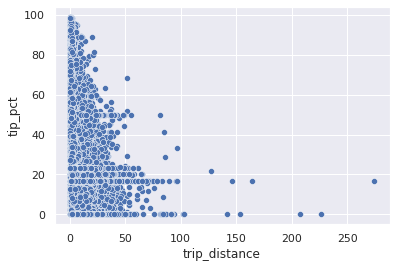

In [25]:
sns.set_style("darkgrid")
sns.scatterplot(data=tip_vs_distance, x="trip_distance", y="tip_pct")

Plotting the distribution of trip_distance

Text(0, 0.5, 'Count of Rides')

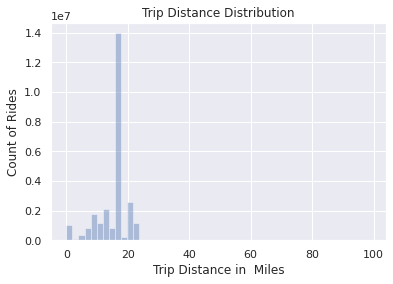

In [23]:
trip_dist = combined_taxi_df["trip_distance"]

sns.set(style="darkgrid")
fig = sns.distplot(combined_taxi_df['tip_pct'], kde=False)
plt.title("Trip Distance Distribution")
plt.xlabel("Trip Distance in  Miles")
plt.ylabel("Count of Rides")                     

Natural Log Transformation on trip_distance

Text(0, 0.5, 'Count of Rides')

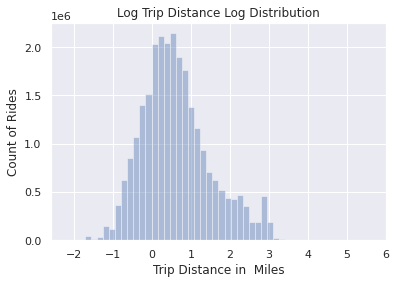

In [28]:
trip_dist['log_distance'] = np.log(combined_taxi_df["trip_distance"])

sns.set(style="darkgrid")
fig = sns.distplot(trip_dist['log_distance'], kde=False)
plt.title("Log Trip Distance Log Distribution")
plt.xlabel("Trip Distance in  Miles")
plt.ylabel("Count of Rides")    

### Tip Percentage VS Ride Duration

In [12]:
trip_duration = combined_taxi_df["diff_hour"]

Text(0, 0.5, 'Number of Rides')

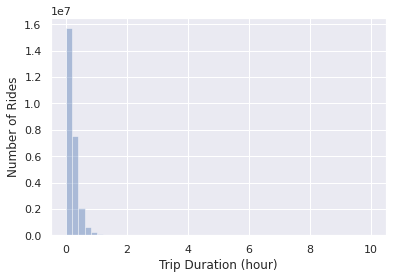

In [15]:
sns.set(style="darkgrid")
fig = sns.distplot(trip_duration, kde=False)
plt.xlabel("Trip Duration (hour)")
plt.ylabel("Number of Rides")

Text(0, 0.5, 'Number of Rides')

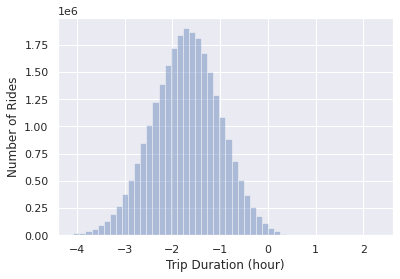

In [29]:
trip_duration = np.log(combined_taxi_df["diff_hour"])
sns.set(style="darkgrid")
fig = sns.distplot(trip_duration, kde=False)
plt.xlabel("Trip Duration (hour)")
plt.ylabel("Number of Rides")

In [7]:
tip_vs_duration = combined_taxi_df[["tip_pct", "diff_hour"]]

<AxesSubplot:xlabel='diff_hour', ylabel='tip_pct'>

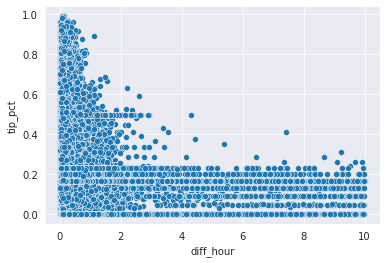

In [8]:
sns.set_style("darkgrid")
sns.scatterplot(data=tip_vs_duration, x="diff_hour", y="tip_pct")